# Perceptron using keras and tensorflow.

In [17]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

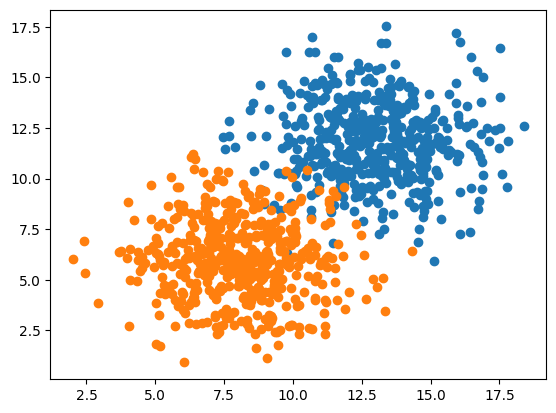

In [10]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts), np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts), np.random.normal(6, 2, n_pts)]).T
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])
plt.show()

In [29]:
model = Sequential()
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))
adam = Adam(learning_rate = 0.1)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(x=X, y=y, verbose=1, batch_size=50, epochs=500, shuffle='true')

Epoch 1/500


/home/omargudino/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4504 - loss: 1.2985  
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7060 - loss: 0.5535 
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8735 - loss: 0.4148 
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8915 - loss: 0.3426 
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9314 - loss: 0.2947 
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9385 - loss: 0.2656 
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9404 - loss: 0.2418 
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9659 - loss: 0.2152 
Epoch 9/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9646 - loss: 0.2034 
Epoch 10/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9639 - loss: 0.1797 
Epoch 11/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9637 - loss: 0.1647 
Epoch 12/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy:

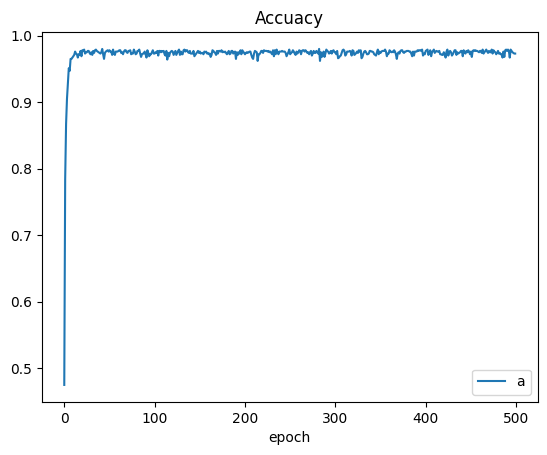

In [30]:
plt.plot(h.history['accuracy'])
plt.title('Accuacy')
plt.xlabel('epoch')
plt.legend('accuarcy')

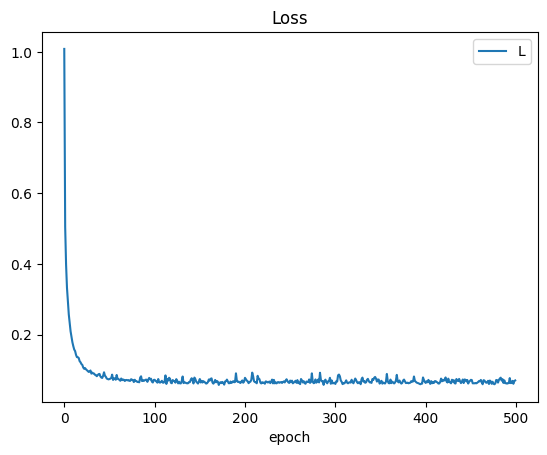

In [31]:
plt.plot(h.history['loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.legend('Loss')

In [50]:
def plot_decision_boundery(X, y, model):
    x_span = np.linspace(min(X[:, 0])-1, max(X[:, 0])+1, 50)
    y_span = np.linspace(min(X[:, 1])-1, max(X[:, 1])+1, 50)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func =  model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)
    plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
    plt.scatter(X[n_pts:, 0], X[n_pts:, 1])

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step


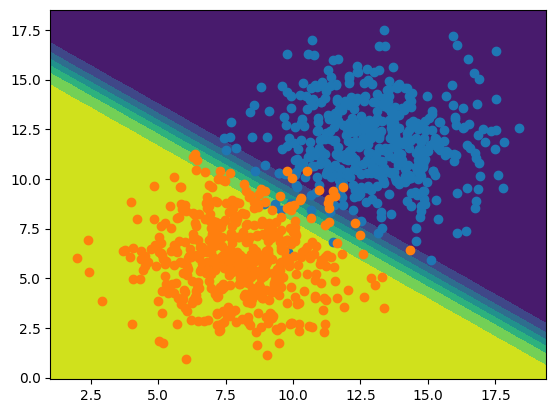

In [51]:
plot_decision_boundery(X, y, model)


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[13.27524]]%


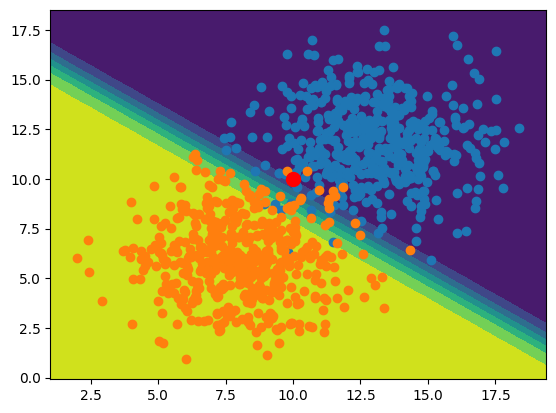

In [65]:
plot_decision_boundery(X, y, model)
x = 10
y = 10
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker="o", markersize=10, color="red")
print(str(prediction*100) + "%")
